Module 1


1.	Experiment 1: Implementation of a single artificial neuron

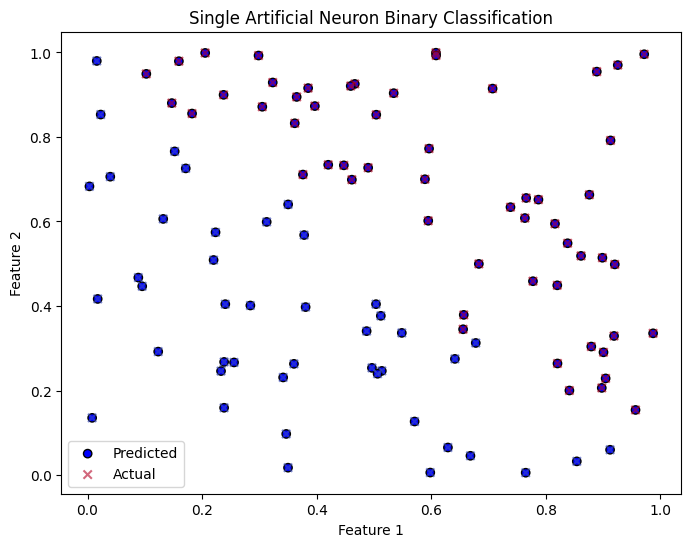

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Input data (features) and corresponding binary labels
X = np.random.rand(100, 2)  # 100 samples with 2 features each
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary classification: sum > 1

# Parameters: weights and bias
weights = np.random.rand(2)
bias = np.random.rand()

# Activation function: Step function for binary classification
def step_function(z):
    return 1 if z > 0 else 0

# Simulating a single artificial neuron
def single_neuron(X, weights, bias):
    z = np.dot(X, weights) + bias
    return np.array([step_function(val) for val in z])

# Predictions
predictions = single_neuron(X, weights, bias)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='bwr', edgecolor='k', label="Predicted")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='x', label="Actual", alpha=0.6)
plt.title("Single Artificial Neuron Binary Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


2.	Experiment 2: Implementation of Single Layer Perceptron (SLP). (AND Gate)

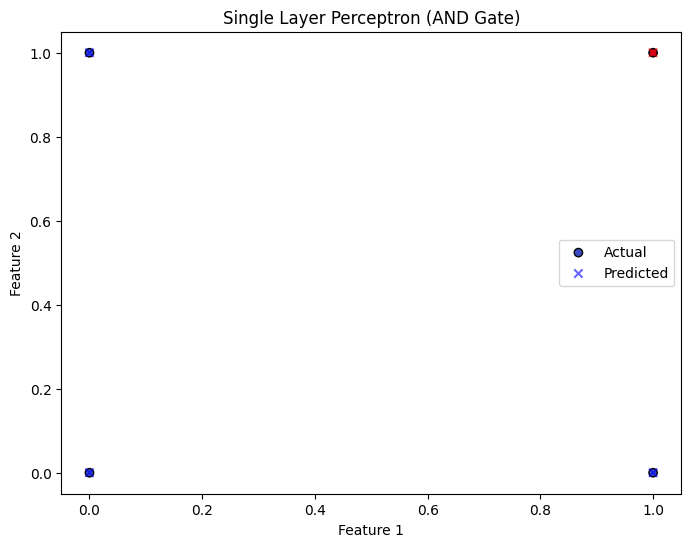

Accuracy: 1.0


In [2]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Dataset for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate labels

# Train a perceptron
model = Perceptron(max_iter=1000, tol=1e-3)
model.fit(X, y)

# Predictions
predictions = model.predict(X)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', label="Actual")
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='bwr', marker='x', label="Predicted", alpha=0.6)
plt.title("Single Layer Perceptron (AND Gate)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Accuracy
print("Accuracy:", accuracy_score(y, predictions))


3.	Experiment 3: Multi-Layer Perceptron (MLP) for XOR Gate.

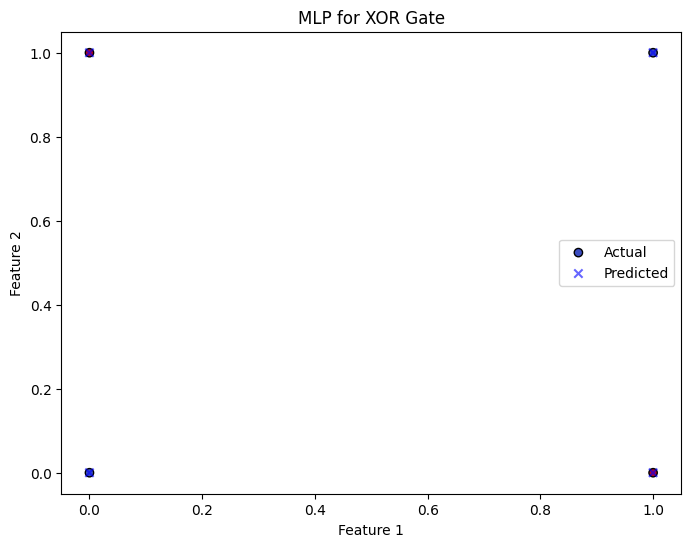

Accuracy: 0.5


In [3]:
from sklearn.neural_network import MLPClassifier

# Dataset for XOR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR gate labels

# Multi-layer perceptron
mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, activation='relu', solver='adam', random_state=42)
mlp.fit(X, y)

# Predictions
predictions = mlp.predict(X)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', label="Actual")
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='bwr', marker='x', label="Predicted", alpha=0.6)
plt.title("MLP for XOR Gate")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Accuracy
print("Accuracy:", accuracy_score(y, predictions))


4.	Experiment 4: Activation Functions.

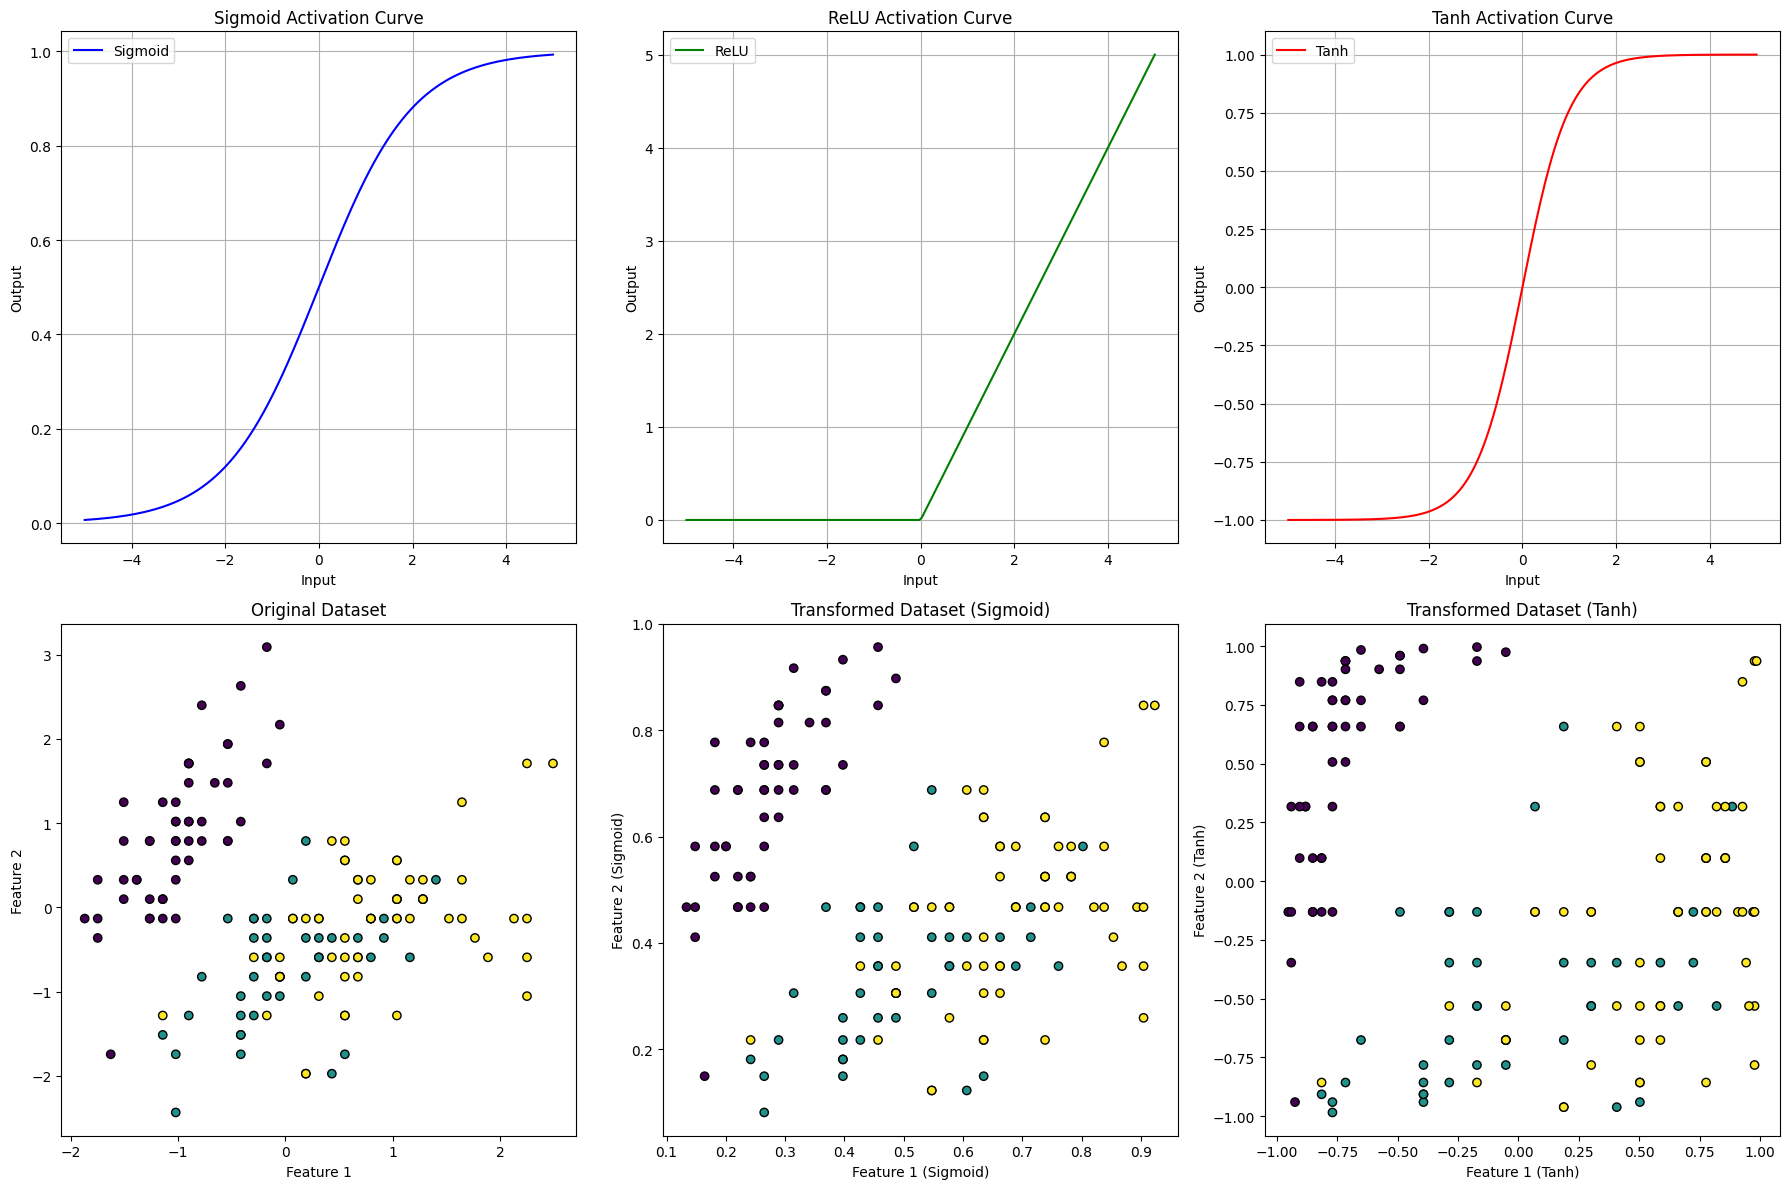

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Generate input range for plotting activation function curves
x_range = np.linspace(-5, 5, 200)

# Load and preprocess Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select first two features for visualization
y = iris.target  # Target labels
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply activation functions to dataset
X_sigmoid = sigmoid(X_scaled)
X_relu = relu(X_scaled)
X_tanh = tanh(X_scaled)

# Plot activation function curves
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Sigmoid curve
axs[0, 0].plot(x_range, sigmoid(x_range), label="Sigmoid", color="blue")
axs[0, 0].set_title("Sigmoid Activation Curve")
axs[0, 0].set_xlabel("Input")
axs[0, 0].set_ylabel("Output")
axs[0, 0].grid()
axs[0, 0].legend()

# ReLU curve
axs[0, 1].plot(x_range, relu(x_range), label="ReLU", color="green")
axs[0, 1].set_title("ReLU Activation Curve")
axs[0, 1].set_xlabel("Input")
axs[0, 1].set_ylabel("Output")
axs[0, 1].grid()
axs[0, 1].legend()

# Tanh curve
axs[0, 2].plot(x_range, tanh(x_range), label="Tanh", color="red")
axs[0, 2].set_title("Tanh Activation Curve")
axs[0, 2].set_xlabel("Input")
axs[0, 2].set_ylabel("Output")
axs[0, 2].grid()
axs[0, 2].legend()

# Scatter plot: Original Data
axs[1, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k')
axs[1, 0].set_title("Original Dataset")
axs[1, 0].set_xlabel("Feature 1")
axs[1, 0].set_ylabel("Feature 2")

# Scatter plot: After Sigmoid
axs[1, 1].scatter(X_sigmoid[:, 0], X_sigmoid[:, 1], c=y, cmap='viridis', edgecolor='k')
axs[1, 1].set_title("Transformed Dataset (Sigmoid)")
axs[1, 1].set_xlabel("Feature 1 (Sigmoid)")
axs[1, 1].set_ylabel("Feature 2 (Sigmoid)")

# Scatter plot: After Tanh
axs[1, 2].scatter(X_tanh[:, 0], X_tanh[:, 1], c=y, cmap='viridis', edgecolor='k')
axs[1, 2].set_title("Transformed Dataset (Tanh)")
axs[1, 2].set_xlabel("Feature 1 (Tanh)")
axs[1, 2].set_ylabel("Feature 2 (Tanh)")

plt.tight_layout()
plt.show()


5.	Experiment 5: Forward and Backpropagation.

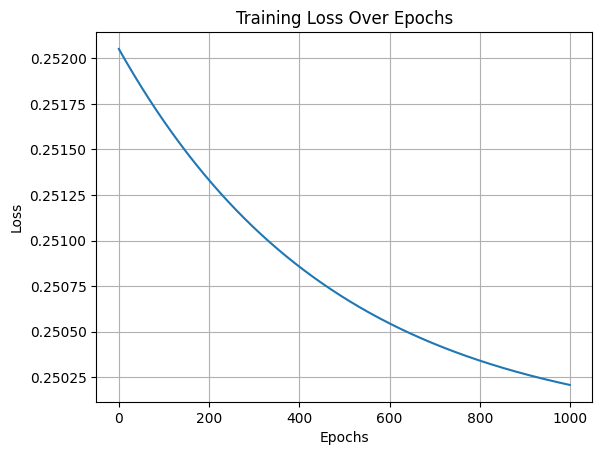

In [5]:
# Manual forward and backward propagation
def forward_backward_propagation(X, y, weights1, weights2, learning_rate=0.01):
    # Forward propagation
    z1 = np.dot(X, weights1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, weights2)
    a2 = sigmoid(z2)

    # Loss (Mean Squared Error)
    loss = np.mean((a2 - y) ** 2)

    # Backpropagation
    d_a2 = 2 * (a2 - y) / y.size
    d_z2 = d_a2 * a2 * (1 - a2)
    d_weights2 = np.dot(a1.T, d_z2)

    d_a1 = np.dot(d_z2, weights2.T)
    d_z1 = d_a1 * a1 * (1 - a1)
    d_weights1 = np.dot(X.T, d_z1)

    # Update weights
    weights1 -= learning_rate * d_weights1
    weights2 -= learning_rate * d_weights2

    return loss, weights1, weights2

# Inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR labels

# Weights initialization
np.random.seed(42)
weights1 = np.random.rand(2, 2)
weights2 = np.random.rand(2, 1)

# Training
losses = []
for epoch in range(1000):
    loss, weights1, weights2 = forward_backward_propagation(X, y, weights1, weights2)
    losses.append(loss)

# Visualization
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()
